In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime 
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import math
import statsmodels.api as sm

In [2]:
data = pd.read_csv('pharma/salesweekly.csv',parse_dates=['datum'],index_col='datum')

In [14]:
data.head()

M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06  Year
datum                                                                
2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0  2014
2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2  2014
2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0  2014
2014-01-26  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0  2014
2014-02-02  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0  2014

In [4]:
data['Year'] = pd.DatetimeIndex(data.index).year

In [5]:
cols = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]

In [5]:
def plot_graph(data,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(data[col])
        plt.title(col)
        

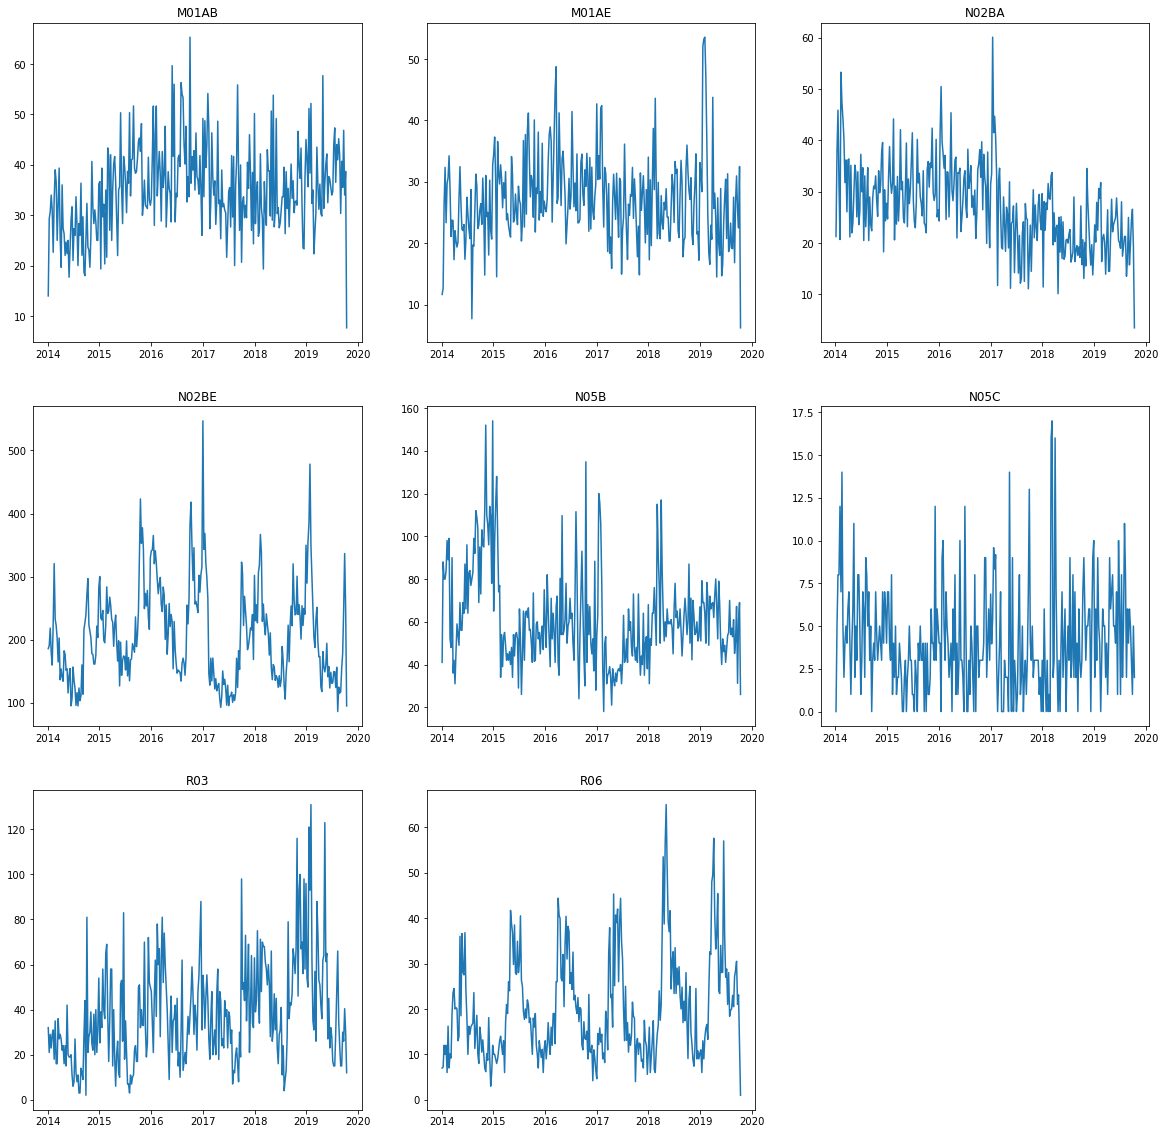

In [7]:
plot_graph(data,cols)

## Rolling Average

In [8]:
years = [2014,2015,2016,2017,2018,2019]

In [9]:
def rolling_avg_graph(data,col):
    fig = plt.figure(figsize=(20, 20))
    for loc,year in enumerate(years):
        plt.subplot(6, 1,loc+1)
        year_mask = data['Year'] == year
        mask_data = data[year_mask]
        arr_mean = mask_data[col].rolling(7).mean()
        arr_std = mask_data[col].rolling(7).std()
        sns.lineplot(x = mask_data.index,y = col,data = mask_data,label = 'HourlySales')
        sns.lineplot(x = mask_data.index,y = arr_mean,data = mask_data,label = 'RollingAvgSales')
        sns.lineplot(x = mask_data.index,y = arr_std,data = mask_data,label = 'RollingStdSales')
        plt.title(col,fontsize=20)

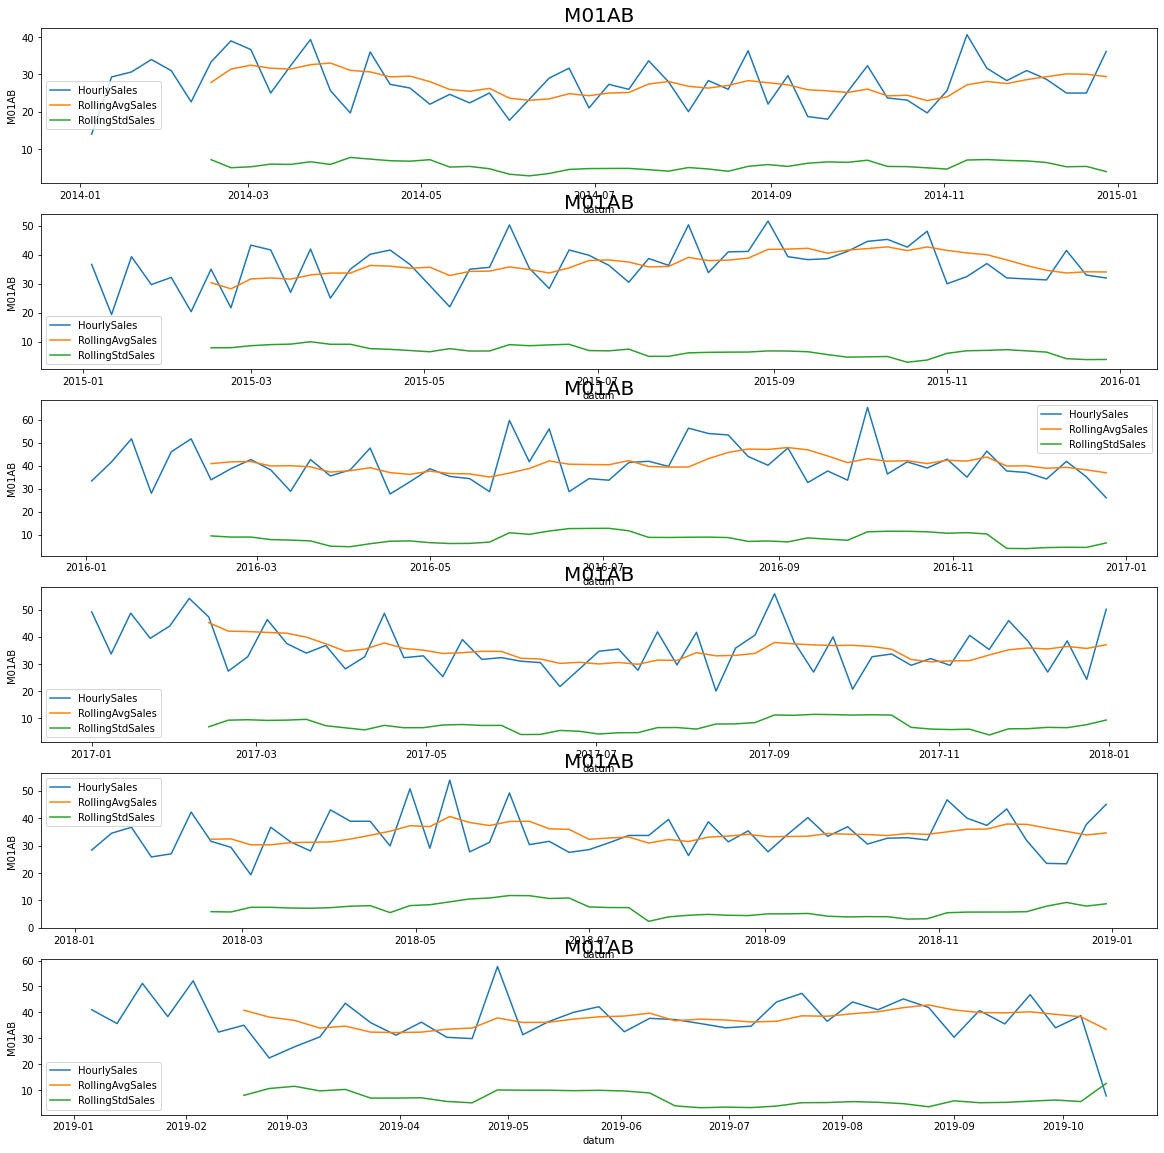

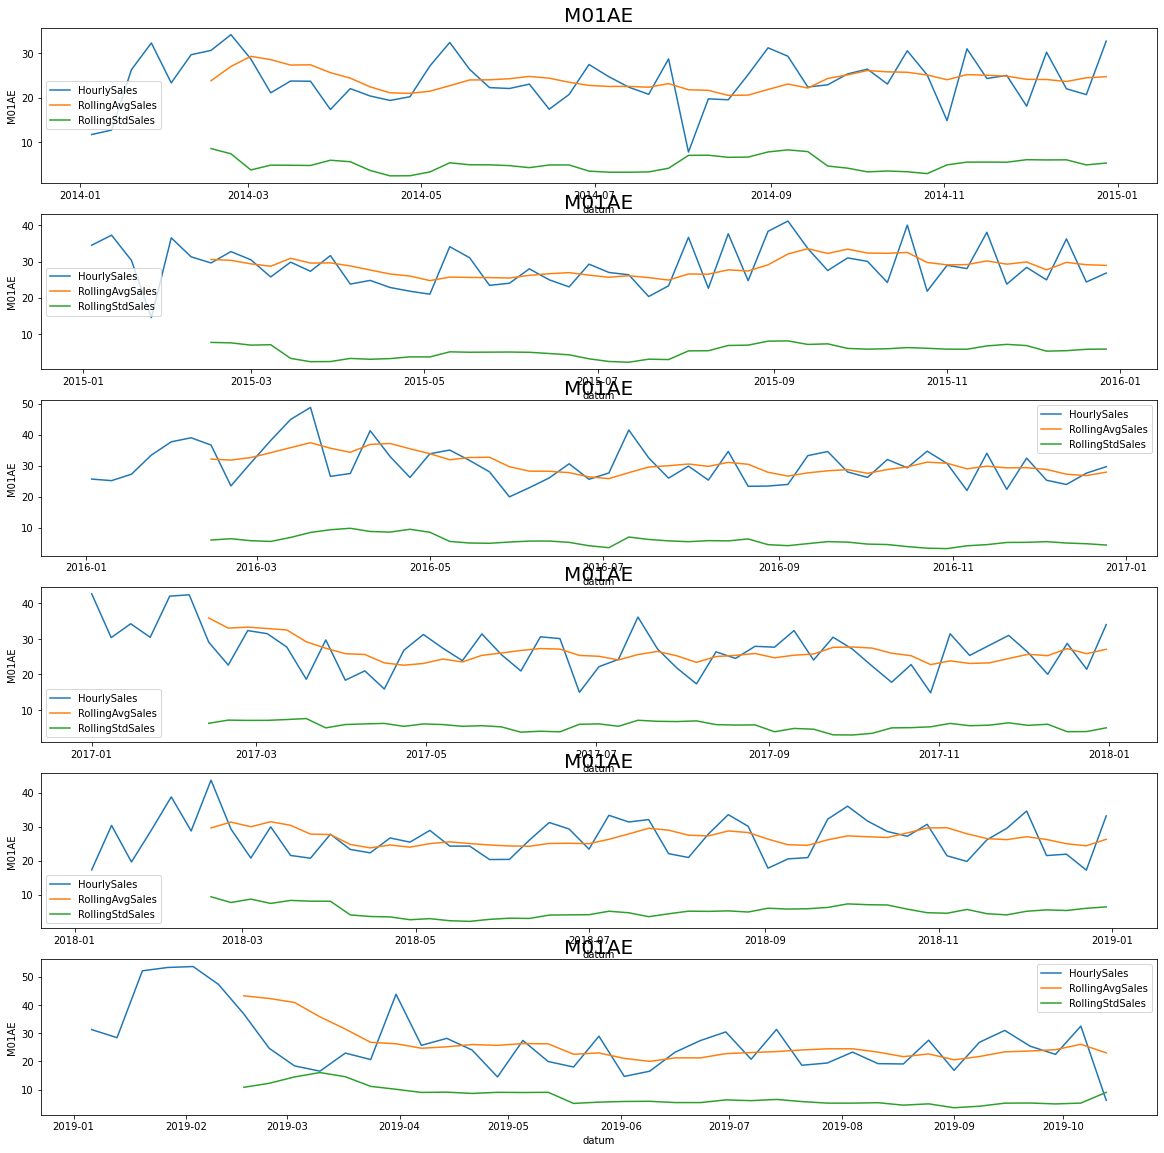

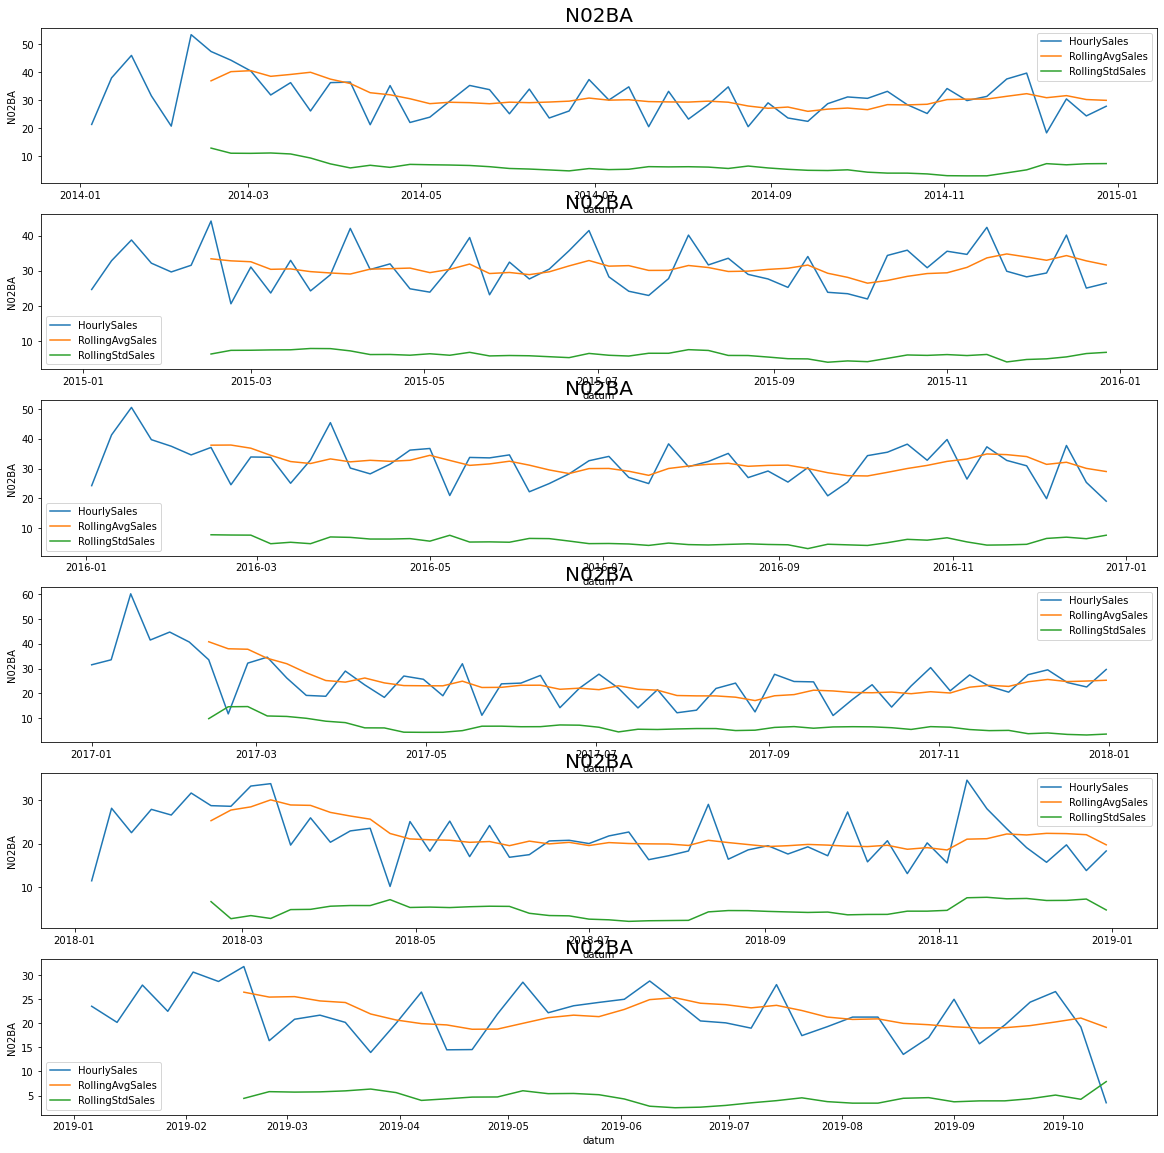

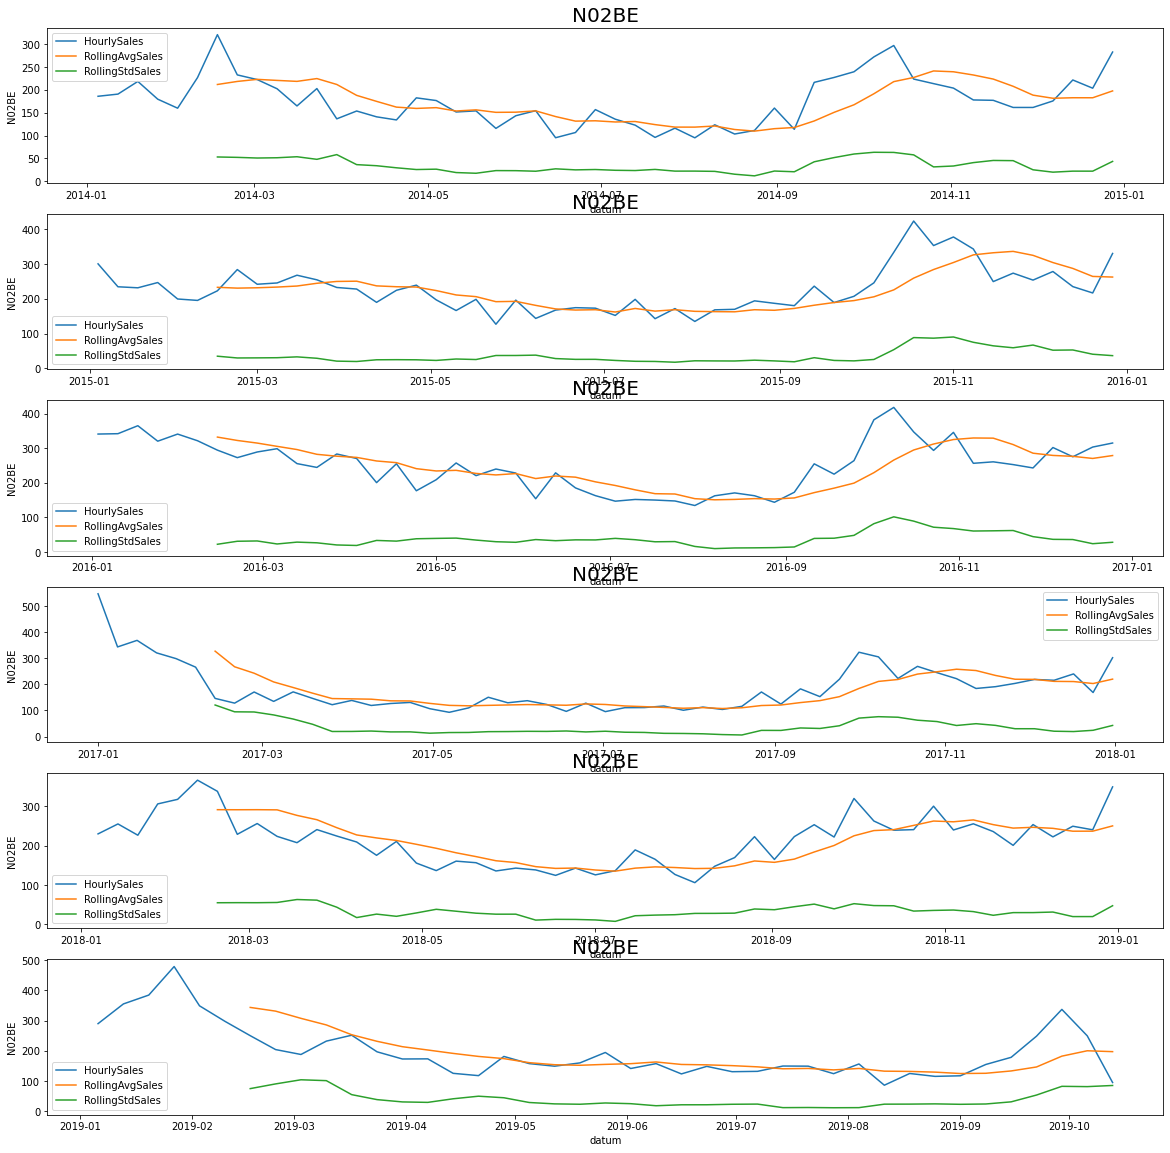

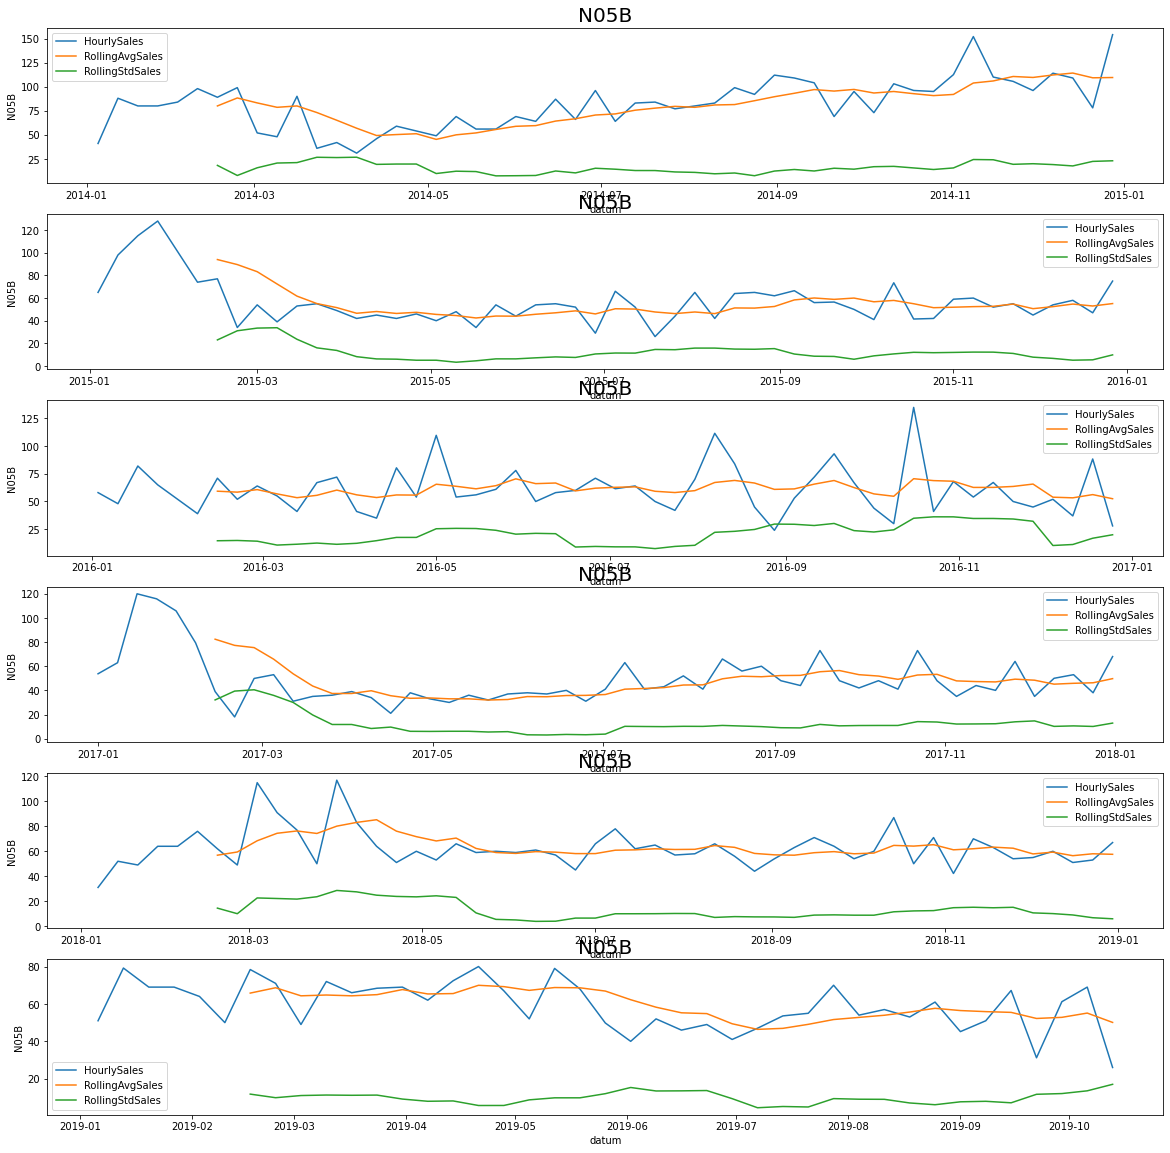

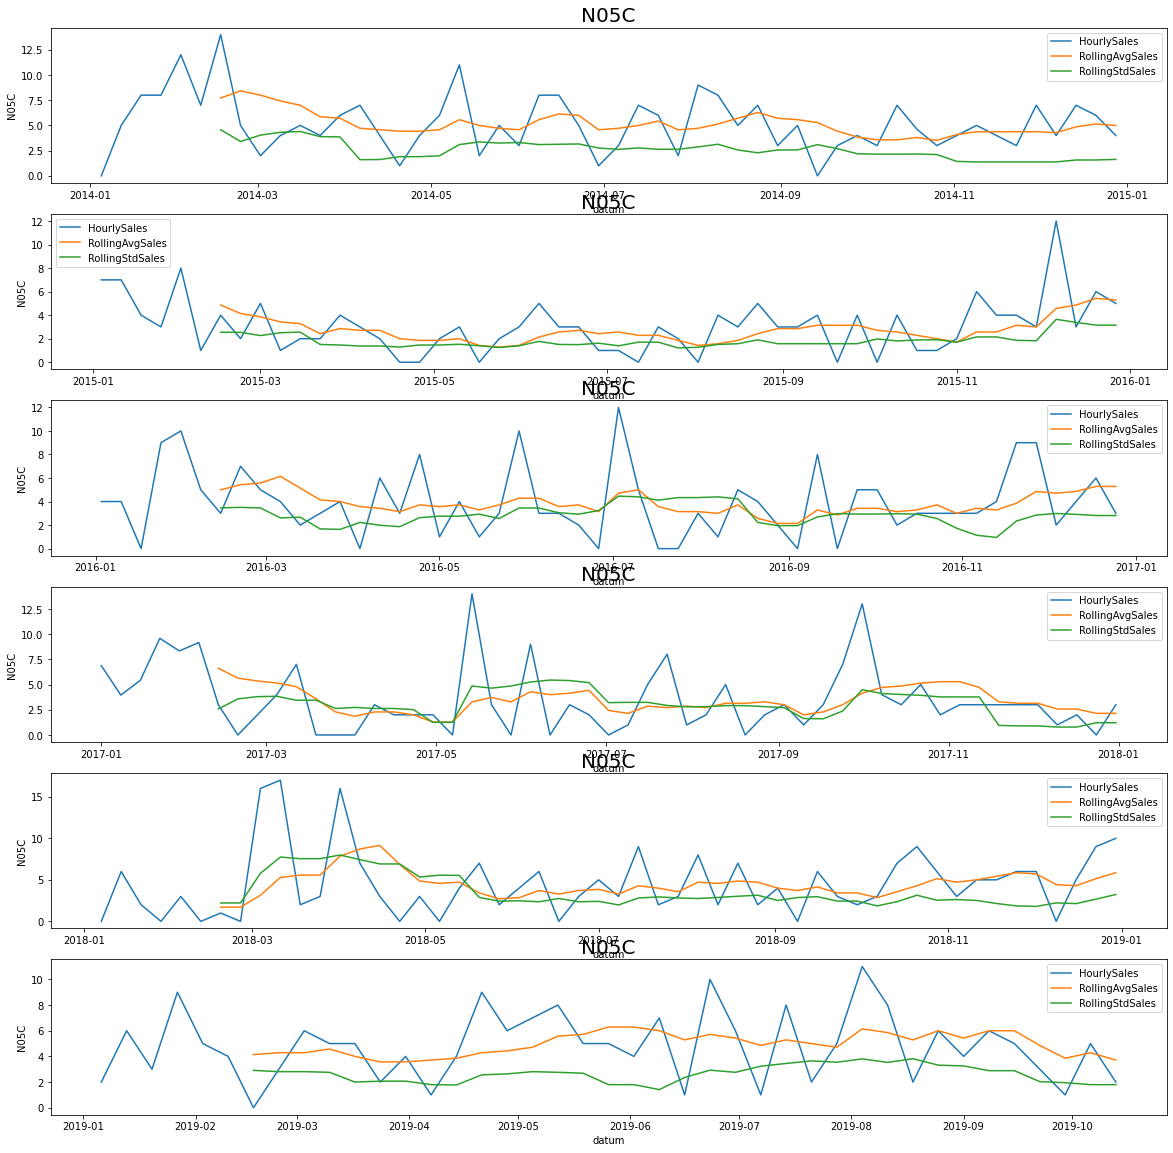

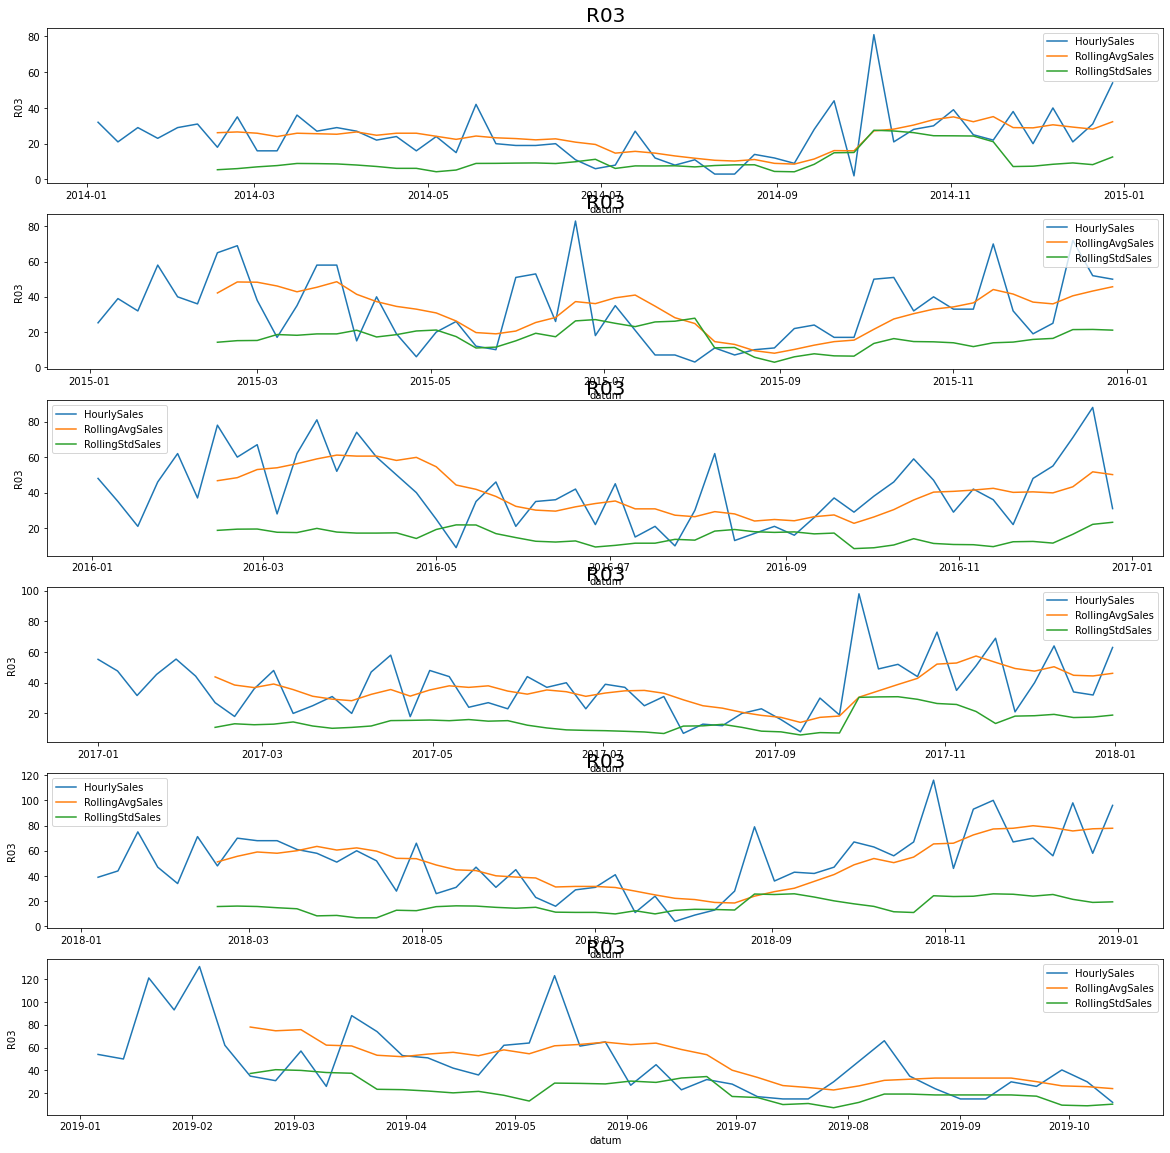

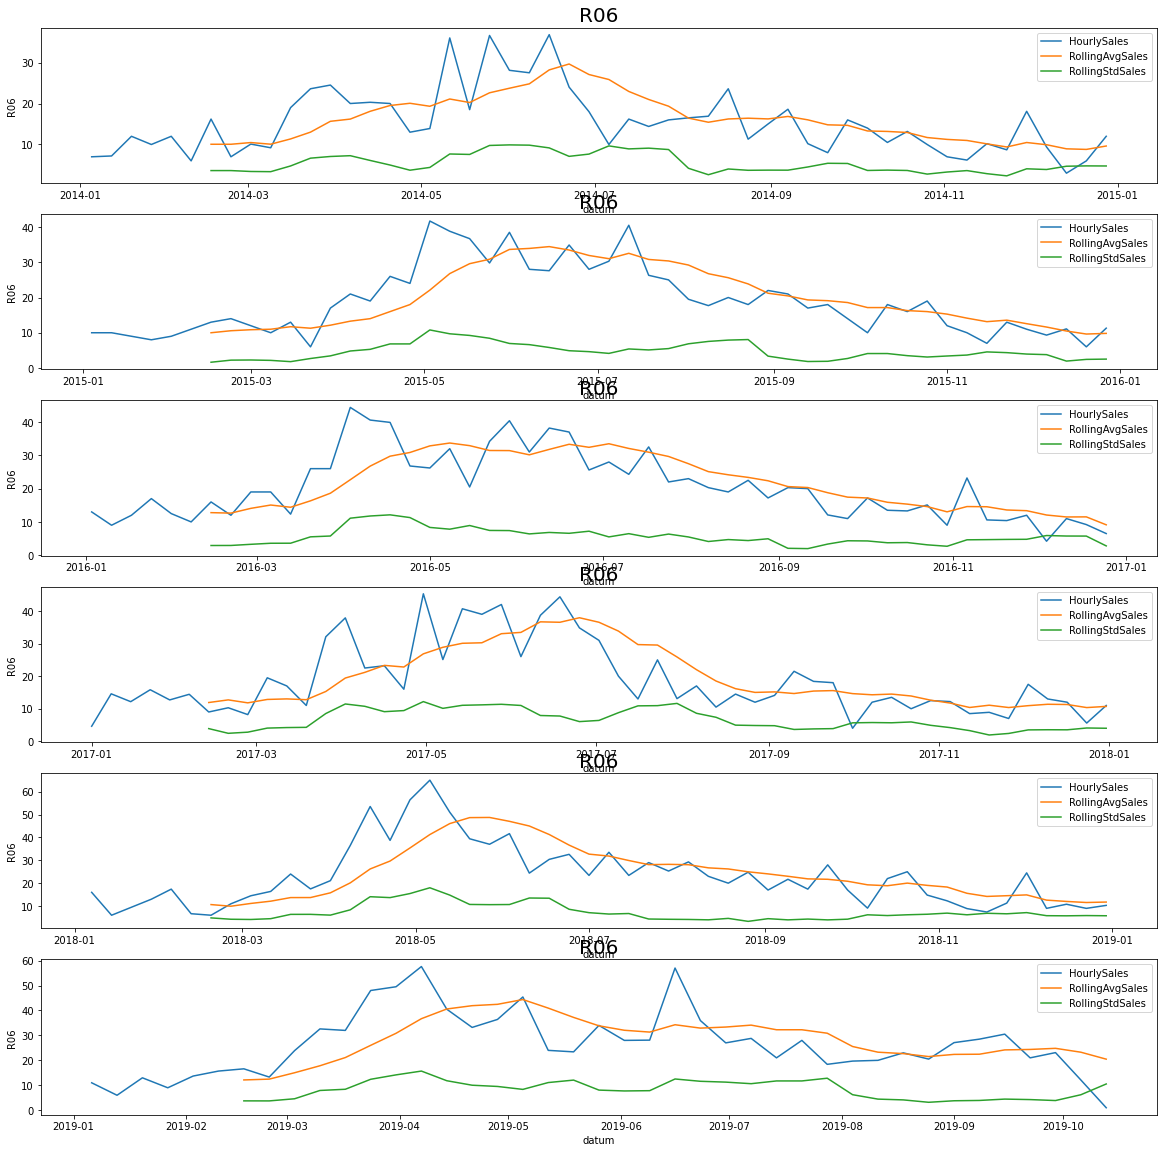

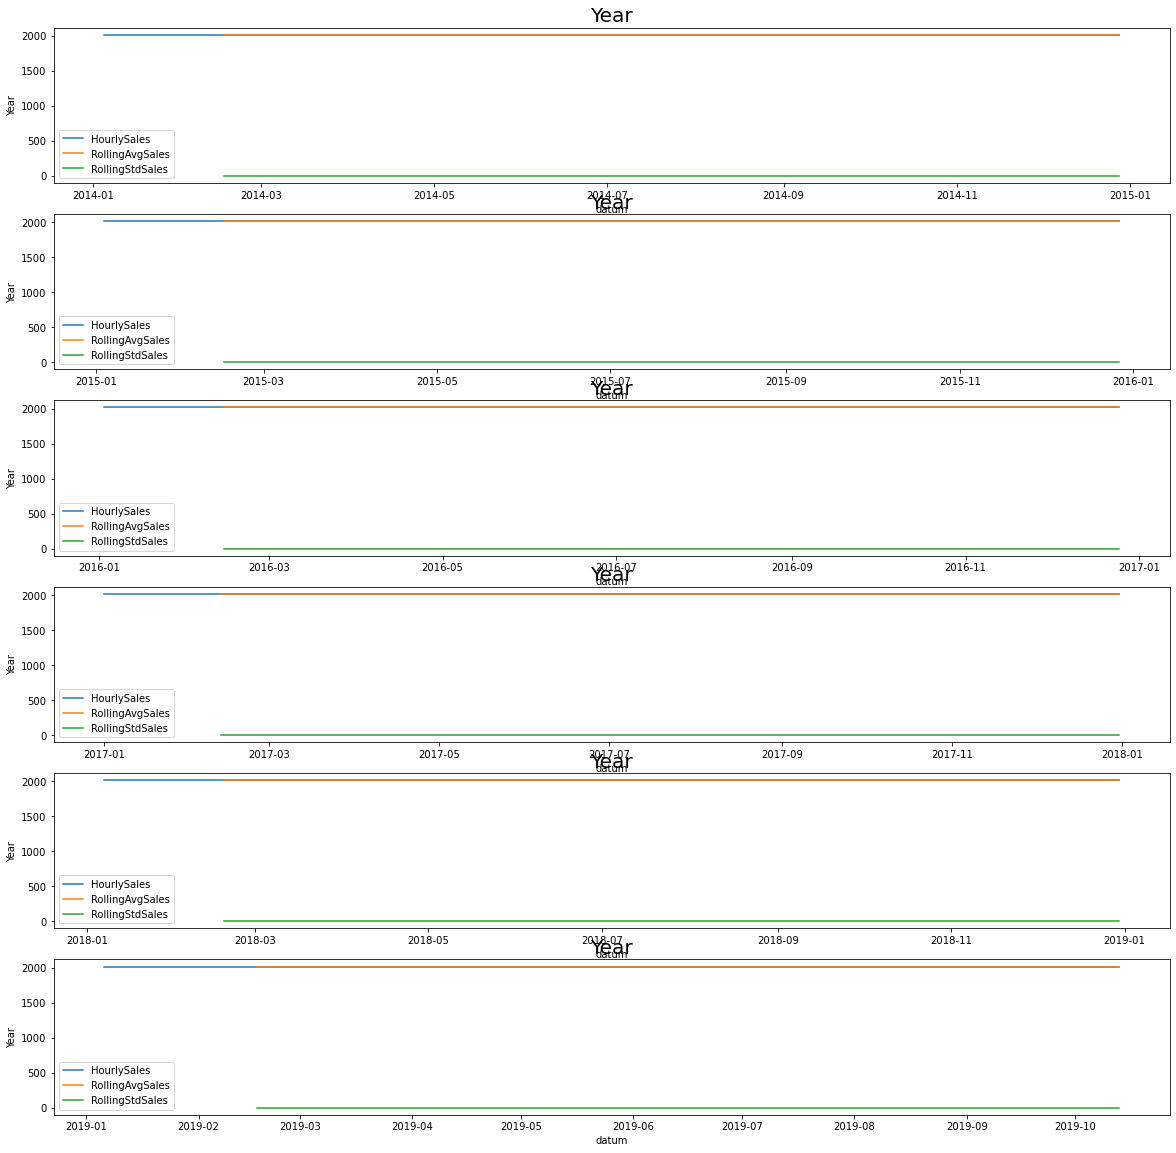

In [10]:
for col in cols:
    rolling_avg_graph(data,col)

## ADF TEST

In [11]:
for col in cols:
    print(col)
    X = data[col]
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if(result[1] <= 0.05):
        print('\tReject Null Hypothesis : Stationary\n')
    else :
        print('\tAccept Null Hypothesis : Non-Stationary\n')

M01AB
ADF Statistic: -3.628724
p-value: 0.005235
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

M01AE
ADF Statistic: -8.739383
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

N02BA
ADF Statistic: -1.721399
p-value: 0.420122
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
	Accept Null Hypothesis : Non-Stationary

N02BE
ADF Statistic: -4.370604
p-value: 0.000334
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

N05B
ADF Statistic: -3.598815
p-value: 0.005784
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

N05C
ADF Statistic: -15.000535
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

R03
ADF Statistic: -3.417632
p-value: 0.010372
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
	Reject Null Hypothesis : Stationary

R06
ADF Stat

In [7]:
df = pd.read_csv('pharma/salesweekly.csv',parse_dates=['datum'],index_col='datum')

### Differencing 

In [8]:
df['N02BA'] = df['N02BA'].diff()

In [9]:
df.head()

M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
datum                                                          
2014-01-05  14.00  11.67    NaN  185.95  41.0   0.0  32.0   7.0
2014-01-12  29.33  12.68   16.6  190.70  88.0   5.0  21.0   7.2
2014-01-19  30.67  26.34    8.0  218.40  80.0   8.0  29.0  12.0
2014-01-26  34.00  32.37  -14.4  179.60  80.0   8.0  23.0  10.0
2014-02-02  31.02  23.35  -10.8  159.88  84.0  12.0  29.0  12.0

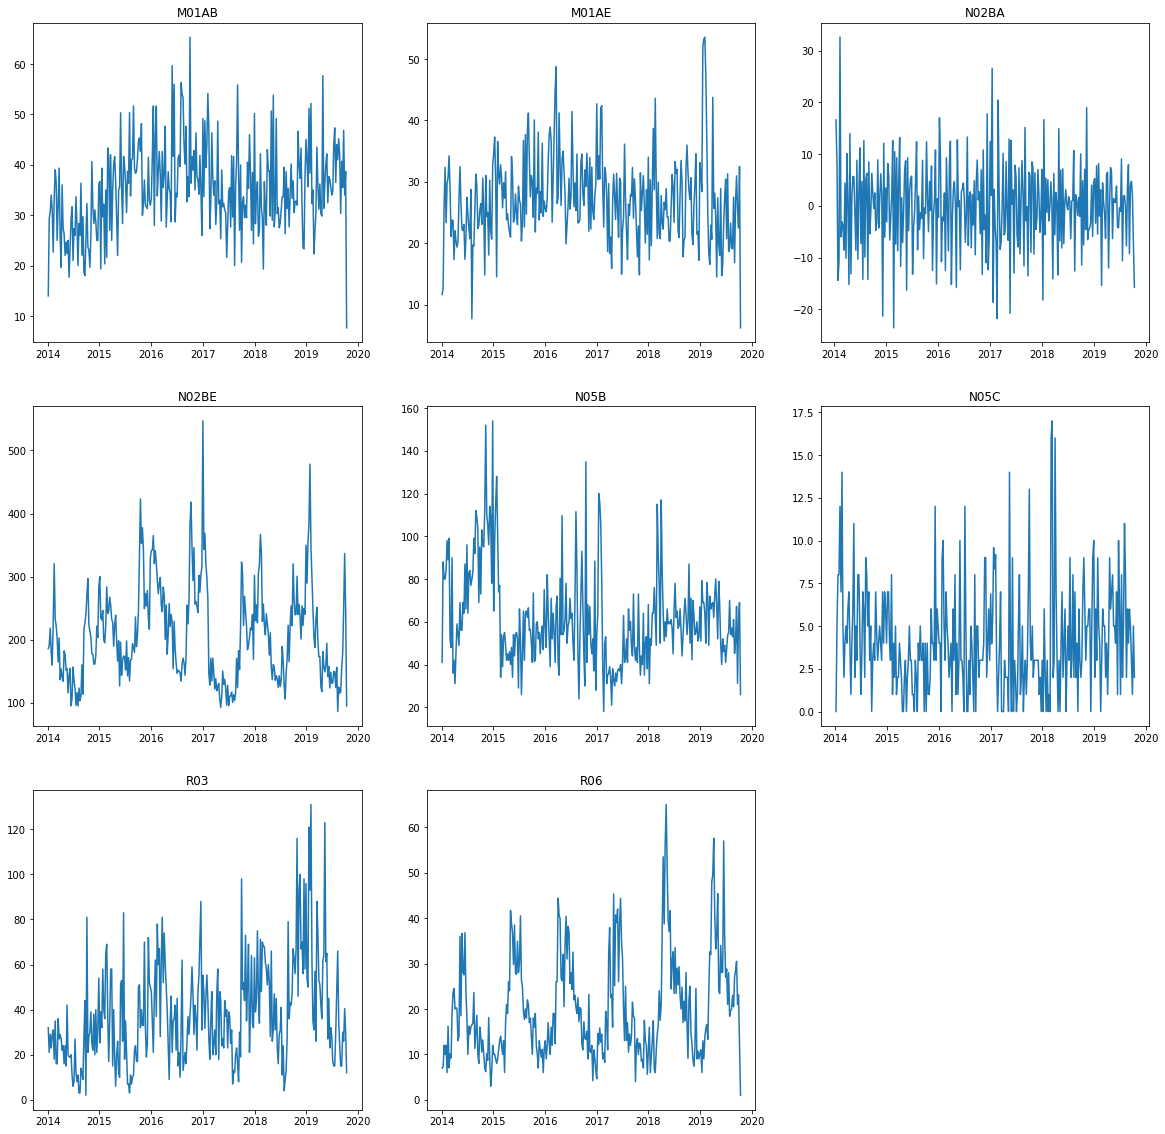

In [12]:
plot_graph(df,cols)

In [10]:
for col in cols:
    print(col)
    X = df[col]
    result = adfuller(X.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

M01AB
ADF Statistic: -3.628724
p-value: 0.005235
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
M01AE
ADF Statistic: -8.739383
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
N02BA
ADF Statistic: -9.202408
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
N02BE
ADF Statistic: -4.370604
p-value: 0.000334
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
N05B
ADF Statistic: -3.598815
p-value: 0.005784
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
N05C
ADF Statistic: -15.000535
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
R03
ADF Statistic: -3.417632
p-value: 0.010372
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
R06
ADF Statistic: -5.028058
p-value: 0.000020
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


## Seasonal Decompose

In [81]:
def seasonal_graph(data,col):
    decompose_result = seasonal_decompose(data[col],model='additive')
    decompose_result.plot()
    plt.title(col) 

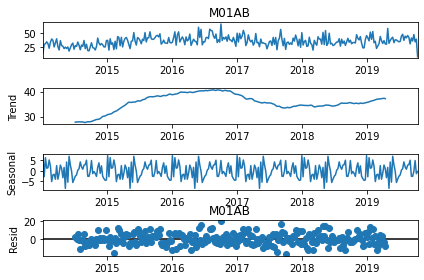

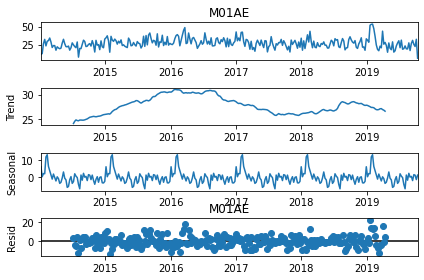

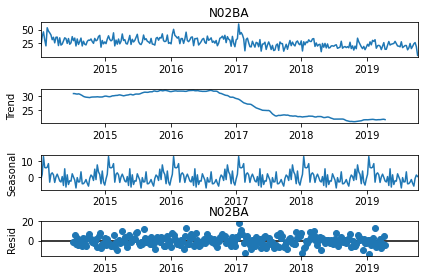

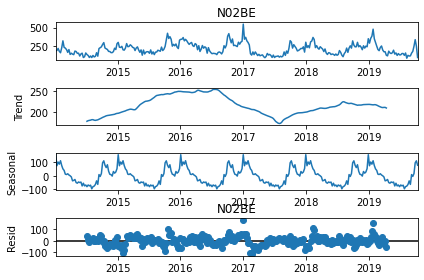

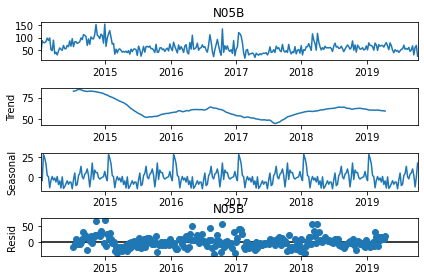

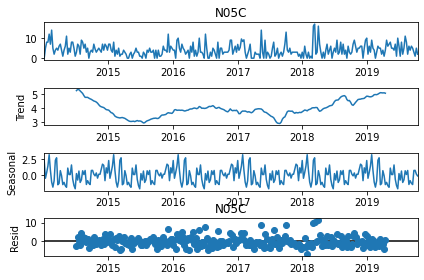

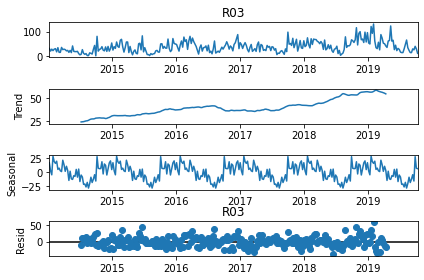

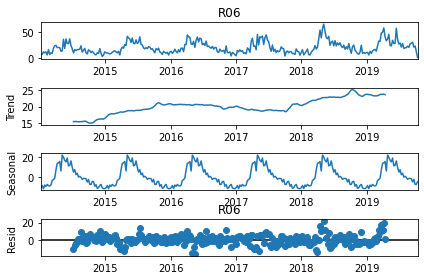

In [84]:
for col in cols:
    seasonal_graph(data,col)

### M01AB

<Figure size 3600x3600 with 0 Axes>

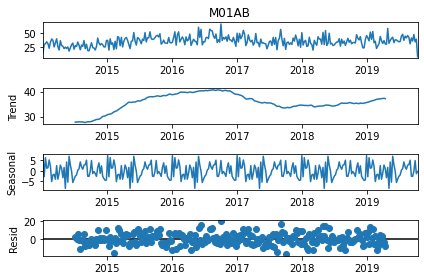

In [13]:
fig = plt.figure(figsize=(50,50))
decompose_result = seasonal_decompose(data["M01AB"],model='additive')
decompose_result.plot();

In [3]:
df = data.loc[:,['M01AB']]
train = df[:-12]
test = df[-12:]

In [15]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

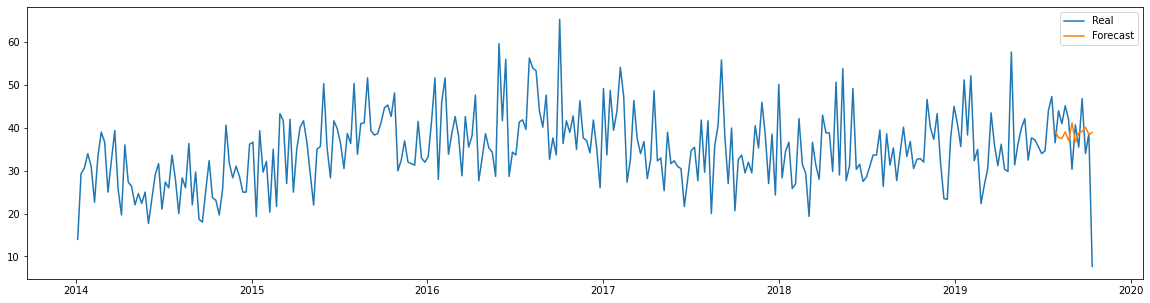

In [16]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [17]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

10.551901784002645


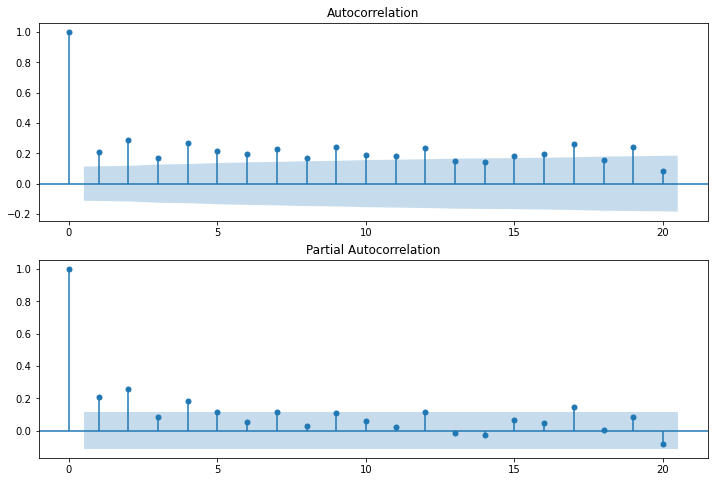

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["M01AB"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["M01AB"],lags=20,ax=ax2)

##### p = 0,1,2 ; q = 0-12

In [11]:
stepwise_fit = auto_arima(data['M01AB'],trace = True,suppress_warnings=True,start_p=0,max_p=4,start_q=0,max_q=12,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2160.902, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2149.125, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2153.991, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3025.850, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2129.749, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2129.798, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2112.681, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2111.041, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2110.472, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2139.281, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2110.334, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2111.654, Time=0.46 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2113.484, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : 

In [4]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(2,0,2))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(2,0,2))
    model = model.fit()
    
    pred = model.predict(start = start,end = end-1,typ='levels')
    
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
    
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  M01AB   No. Observations:                  301
Model:                     ARMA(2, 2)   Log Likelihood               -1038.356
Method:                       css-mle   S.D. of innovations              7.609
Date:                Thu, 03 Jun 2021   AIC                           2088.712
Time:                        15:26:05   BIC                           2110.954
Sample:                    01-05-2014   HQIC                          2097.612
                         - 10-06-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.8099      2.439     14.274      0.000      30.030      39.590
ar.L1.M01AB     0.3042      0.230      1.322      0.186      -0.147       0.755
ar.L2.M01AB     0.6657      0.227      2.938    

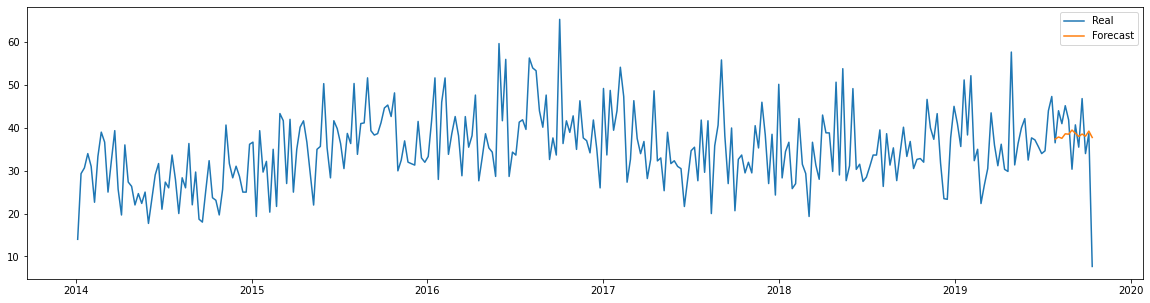

In [5]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [6]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

9.952764241859706


In [8]:
stepwise_fit = auto_arima(data['M01AB'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=2119.789, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2160.902, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2141.080, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2145.117, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3025.850, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=2112.164, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=2110.334, Time=0.43 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=2118.676, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2110.472, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2112.681, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[7] intercept   : AIC=2111.654, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2111.041, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=2113.484, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : 

In [11]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(2,0,2),seasonal_order=(0,0,0,7))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

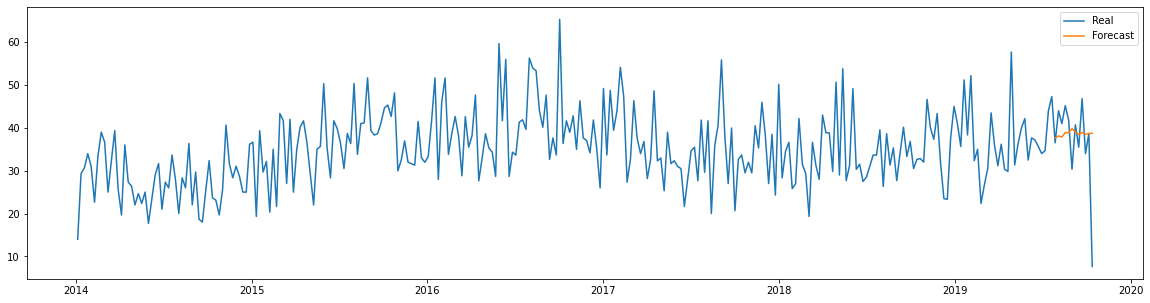

In [12]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [13]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

10.17636200904081


## M01AE

<Figure size 3600x3600 with 0 Axes>

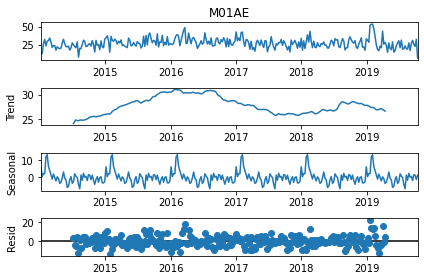

In [18]:

decompose_result = seasonal_decompose(data["M01AE"],model='additive')
decompose_result.plot();

In [21]:
df = data.loc[:,['M01AE']]
train = df[:-12]
test = df[-12:]

In [27]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

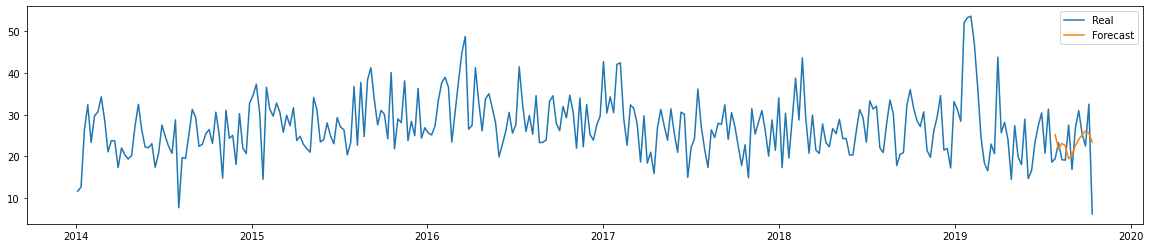

In [28]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [29]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.857243493162445


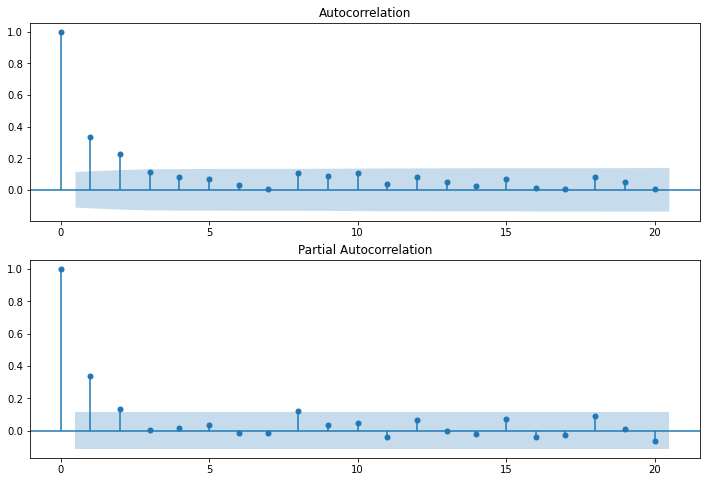

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["M01AE"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["M01AE"],lags=20,ax=ax2)

##### p = 0, 1, 2; q = 0, 1, 2

In [17]:
stepwise_fit = auto_arima(data['M01AE'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2039.108, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2002.967, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2012.967, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2873.045, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1999.647, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2001.651, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2000.004, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2060.243, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.772 seconds


In [15]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(2,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(2,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  M01AE   No. Observations:                  301
Model:                     ARMA(2, 0)   Log Likelihood                -987.302
Method:                       css-mle   S.D. of innovations              6.429
Date:                Thu, 03 Jun 2021   AIC                           1982.604
Time:                        15:33:16   BIC                           1997.433
Sample:                    01-05-2014   HQIC                          1988.538
                         - 10-06-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.1961      0.661     41.129      0.000      25.900      28.492
ar.L1.M01AE     0.3170      0.057      5.520      0.000       0.204       0.430
ar.L2.M01AE     0.1243      0.058      2.150    

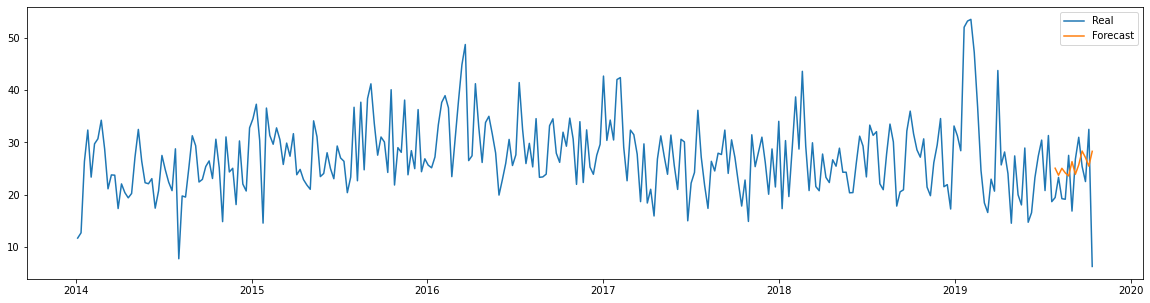

In [16]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [17]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

8.157577826417674


In [18]:
stepwise_fit = auto_arima(data['M01AE'],trace = True,suppress_warnings=True,test='adf',m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=2016.267, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2039.108, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2004.495, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2014.856, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2873.045, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2002.967, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=2004.471, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=2006.440, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=1999.647, Time=0.15 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=2000.717, Time=0.44 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=2000.666, Time=0.36 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=2002.570, Time=0.63 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=2001.646, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2001.651, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept

In [22]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(2,0,0),seasonal_order=(0,0,0,7))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

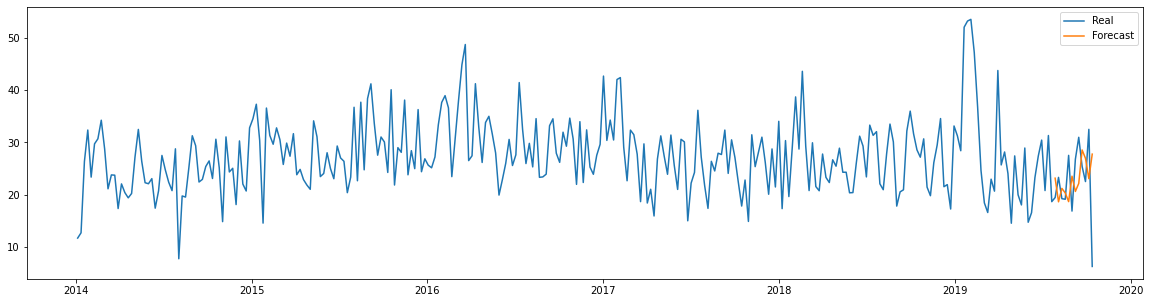

In [23]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [24]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

8.47729614975461


In [25]:
stepwise_fit = auto_arima(data['M01AE'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2005.743, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2039.108, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2003.173, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2013.060, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2873.045, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2002.967, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2003.358, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2004.605, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1999.647, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2000.362, Time=0.51 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2000.495, Time=0.45 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2002.339, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2001.646, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2001.651, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0

In [26]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(2,0,0),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

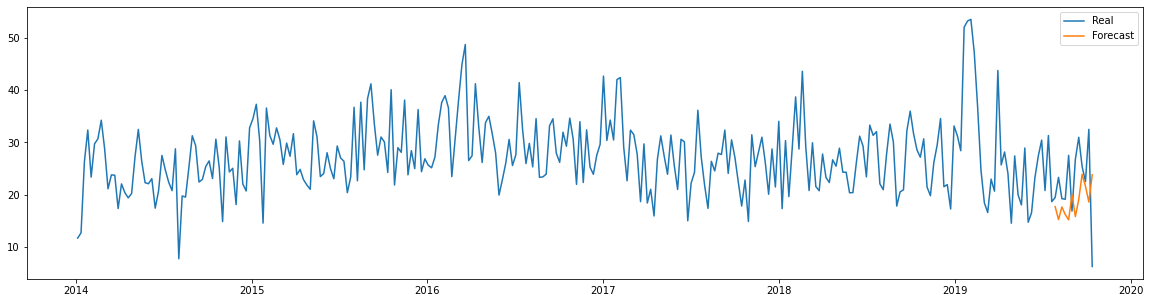

In [27]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [28]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

9.17048037728875


## N02BA

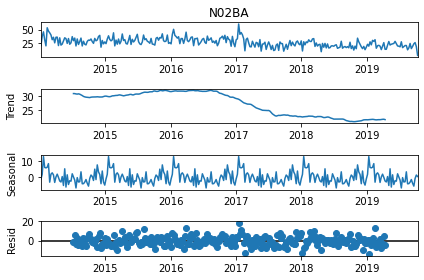

In [30]:
decompose_result = seasonal_decompose(data["N02BA"],model='additive')
decompose_result.plot();

In [29]:
df = data.loc[:,['N02BA']]
train = df[:-12]
test = df[-12:]

In [32]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

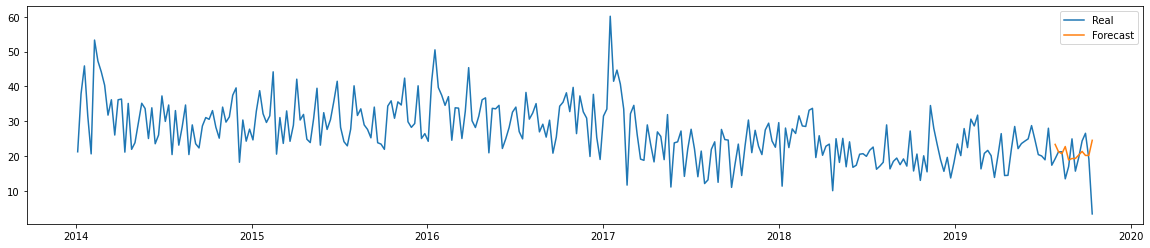

In [33]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [34]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.342494920106458


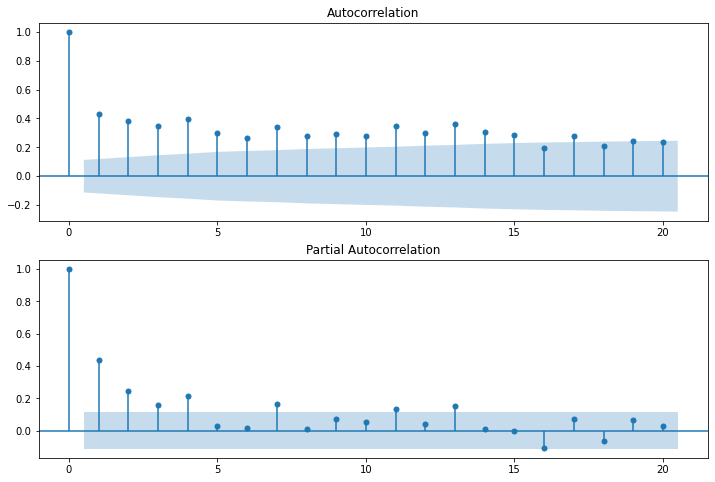

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N02BA"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N02BA"],lags=20,ax=ax2)

##### p = 0, 1, 2, 3, 4 ; q = 0-17

In [34]:
stepwise_fit = auto_arima(data['N02BA'],trace = True,suppress_warnings=True,start_p=0,max_p=4,start_q=0,max_q=17,test='adf',d=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2146.326, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2079.705, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2007.238, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2144.341, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2006.509, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2008.036, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2009.282, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2006.776, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2057.514, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2009.640, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2005.990, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2006.386, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2077.745, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2007.697, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [30]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,1,1))

for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,1,1))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                             ARIMA Model Results                              
Dep. Variable:                D.N02BA   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -993.169
Method:                       css-mle   S.D. of innovations              6.613
Date:                Thu, 03 Jun 2021   AIC                           1994.337
Time:                        15:54:11   BIC                           2009.153
Sample:                    01-12-2014   HQIC                          2000.266
                         - 10-06-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0450      0.040     -1.126      0.260      -0.123       0.033
ar.L1.D.N02BA     0.1132      0.071      1.603      0.109      -0.025       0.252
ma.L1.D.N02BA    -0.9104      0.037    -

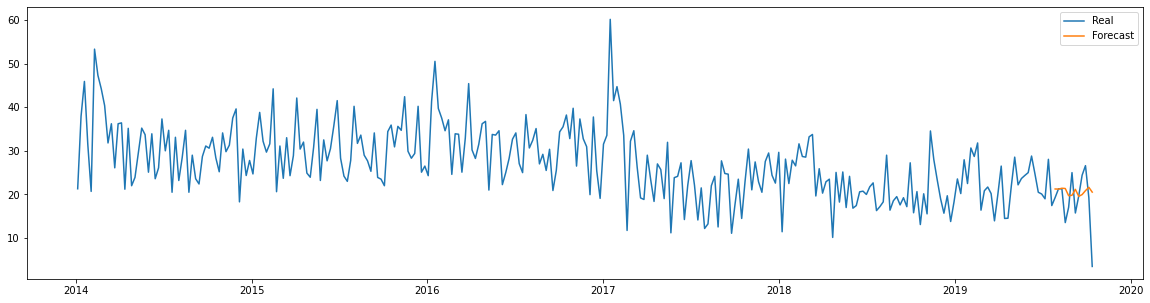

In [31]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [32]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.301657934396773


In [33]:
stepwise_fit = auto_arima(data['N02BA'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2122.512, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2060.594, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2079.361, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2876.821, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2059.886, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2061.166, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2047.480, Time=0.57 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2040.461, Time=1.52 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2041.069, Time=1.24 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=2036.807, Time=1.91 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=2049.752, Time=0.67 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=2073.132, Time=1.41 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=2027.255, Time=1.48 sec
 ARIMA(2,0,0)(1,0,2)[12]

In [34]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(4,0,0),seasonal_order=(2,0,1,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

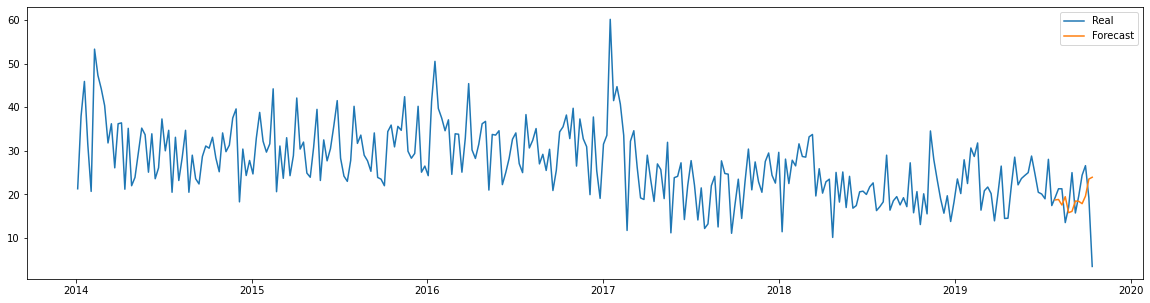

In [35]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [36]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.482617354138775


## N02BE

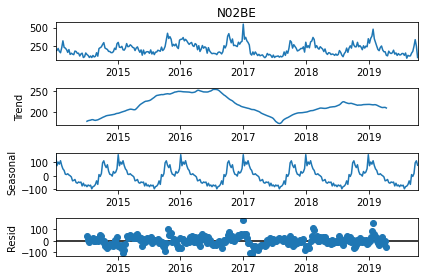

In [41]:
decompose_result = seasonal_decompose(data["N02BE"],model='additive')
decompose_result.plot();

In [40]:
df = data.loc[:,['N02BE']]
train = df[:-12]
test = df[-12:]

In [37]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

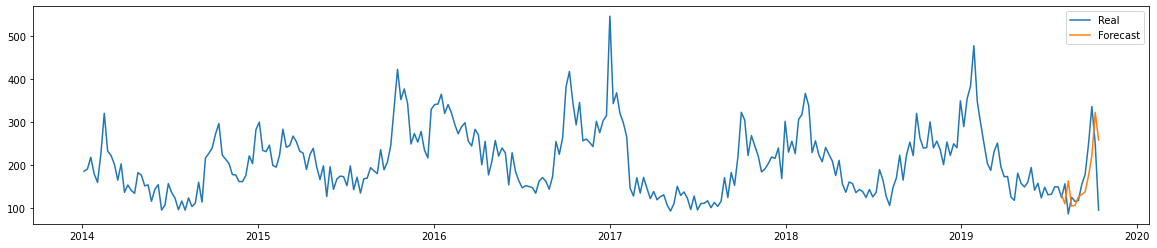

In [38]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [39]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

71.73572737738795


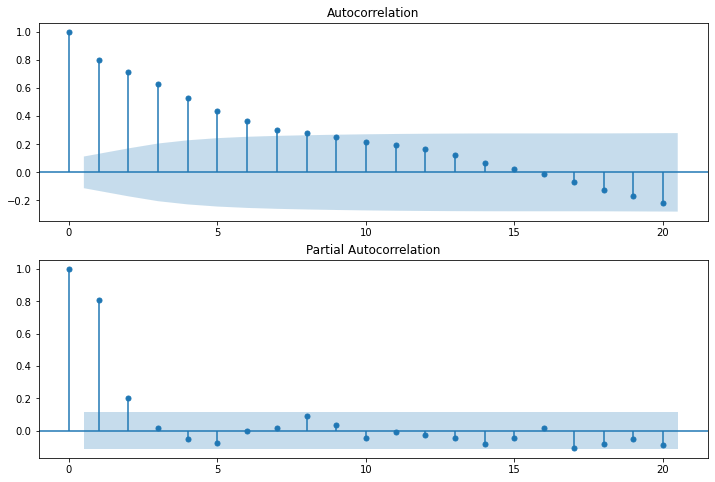

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N02BE"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N02BE"],lags=20,ax=ax2)

##### p = 0, 1, 2 ; q = 0-8

In [38]:
stepwise_fit = auto_arima(data['N02BE'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=8,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3476.350, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3162.355, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3314.679, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4122.309, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3153.932, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3155.932, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3154.727, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3171.299, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.625 seconds


In [41]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(2,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(2,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  N02BE   No. Observations:                  301
Model:                     ARMA(2, 0)   Log Likelihood               -1561.091
Method:                       css-mle   S.D. of innovations             43.185
Date:                Thu, 27 May 2021   AIC                           3130.183
Time:                        09:57:00   BIC                           3145.011
Sample:                    01-05-2014   HQIC                          3136.116
                         - 10-06-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         209.8132     16.250     12.912      0.000     177.965     241.662
ar.L1.N02BE     0.6364      0.056     11.298      0.000       0.526       0.747
ar.L2.N02BE     0.2138      0.057      3.780    

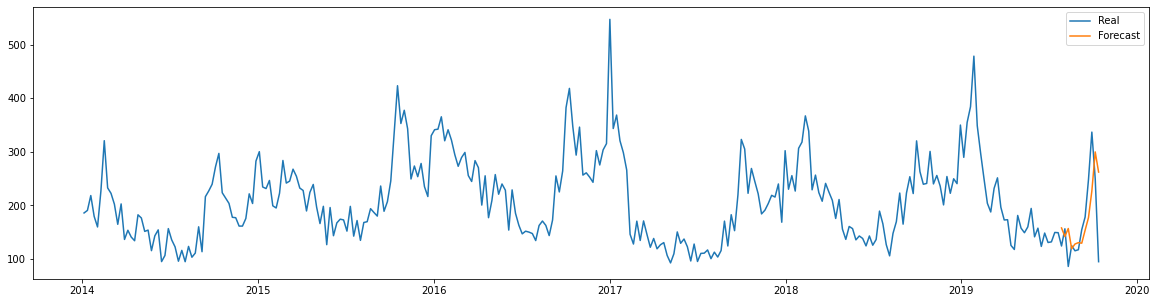

In [42]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [43]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

67.98869833066067


In [37]:
stepwise_fit = auto_arima(data['N02BE'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3158.868, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3476.350, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3163.718, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3306.556, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4122.309, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3157.313, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=3156.502, Time=0.44 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3158.642, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=3155.497, Time=0.22 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3156.499, Time=0.55 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=3156.296, Time=0.41 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=3157.402, Time=0.83 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=3243.855, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3154.727, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0

In [38]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(2,0,0),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

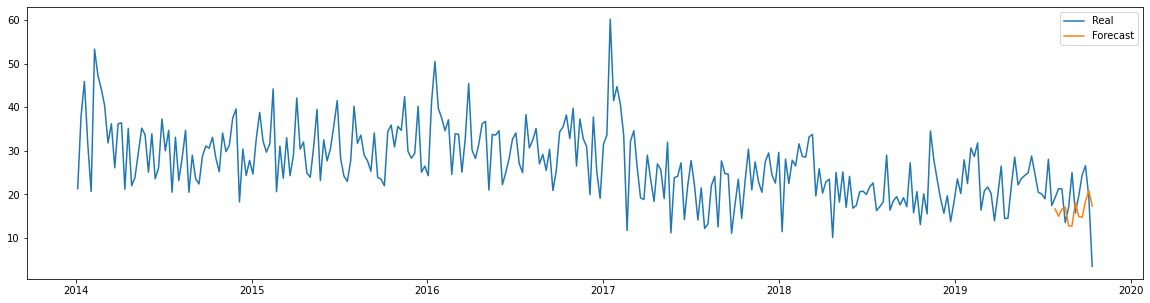

In [39]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [40]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.24735659955766


## N05B	

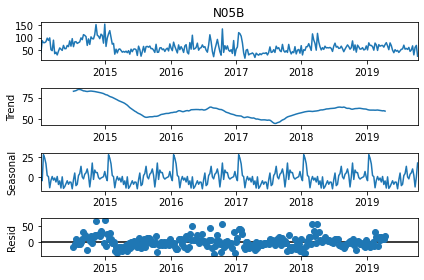

In [42]:
decompose_result = seasonal_decompose(data["N05B"],model='additive')
decompose_result.plot();

In [49]:
df = data.loc[:,['N05B']]
train = df[:-12]
test = df[-12:]

In [47]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

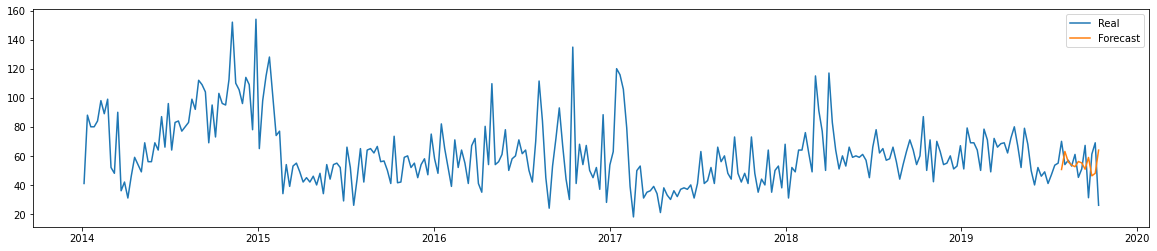

In [48]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [49]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

17.813854846280357


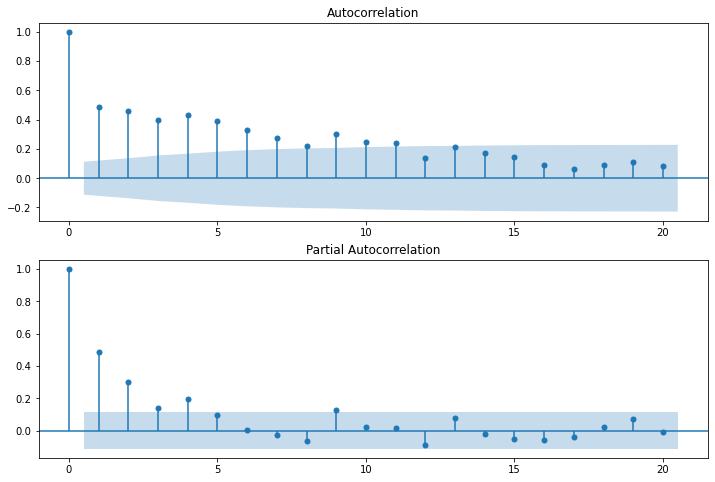

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N05B"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N05B"],lags=20,ax=ax2)

##### p = 0, 1, 2, 3, 4 ; q = 0-11

In [45]:
stepwise_fit = auto_arima(data['N05B'],trace = True,suppress_warnings=True,start_p=0,max_p=4,start_q=0,max_q=11,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2738.906, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2658.762, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2692.041, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3386.642, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2633.509, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2630.019, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2620.268, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2620.086, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2621.817, Time=0.34 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2620.644, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2622.997, Time=0.42 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2631.637, Time=0.14 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 2.379 seconds


In [42]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(4,0,1))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(4,0,1))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                   N05B   No. Observations:                  301
Model:                     ARMA(4, 1)   Log Likelihood               -1297.240
Method:                       css-mle   S.D. of innovations             17.988
Date:                Thu, 03 Jun 2021   AIC                           2608.481
Time:                        15:59:00   BIC                           2634.430
Sample:                    01-05-2014   HQIC                          2618.865
                         - 10-06-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.9495      4.395     14.096      0.000      53.336      70.563
ar.L1.N05B     0.5862      0.205      2.856      0.004       0.184       0.989
ar.L2.N05B     0.1056      0.087      1.214      0.2

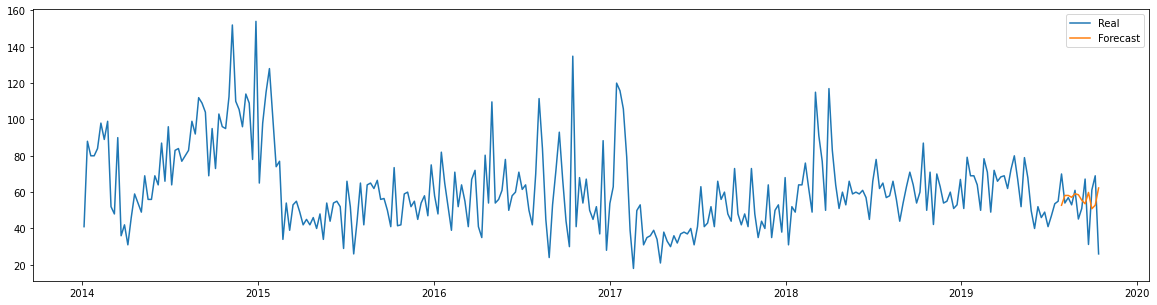

In [43]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [44]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

16.398842669905733


In [45]:
stepwise_fit = auto_arima(data['N05B'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2738.906, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2659.308, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2693.703, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3386.642, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2658.762, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2659.673, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2649.351, Time=0.57 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2650.748, Time=1.17 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=2651.498, Time=1.11 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2655.953, Time=0.49 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2654.841, Time=1.38 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=2655.788, Time=1.48 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2736.096, Time=0.48 sec
 ARIMA(2,0,0)(1,0,1)[12]

In [50]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

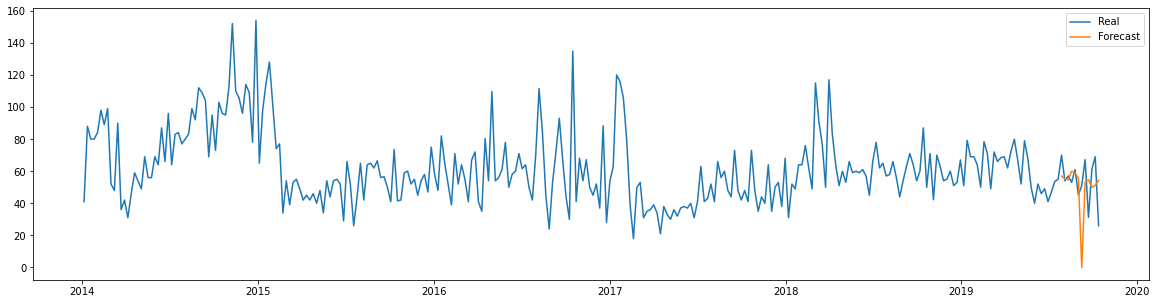

In [51]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [52]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

20.260523073182586


## N05C	

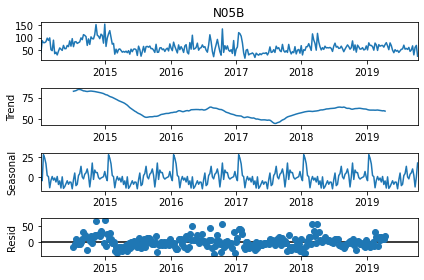

In [50]:
decompose_result = seasonal_decompose(data["N05B"],model='additive')
decompose_result.plot();

In [60]:
df = data.loc[:,['N05C']]
train = df[:-12]
test = df[-12:]

In [55]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

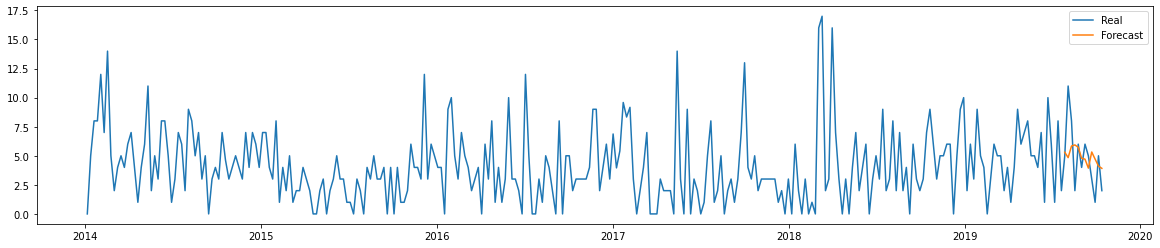

In [56]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [57]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

2.666275554634124


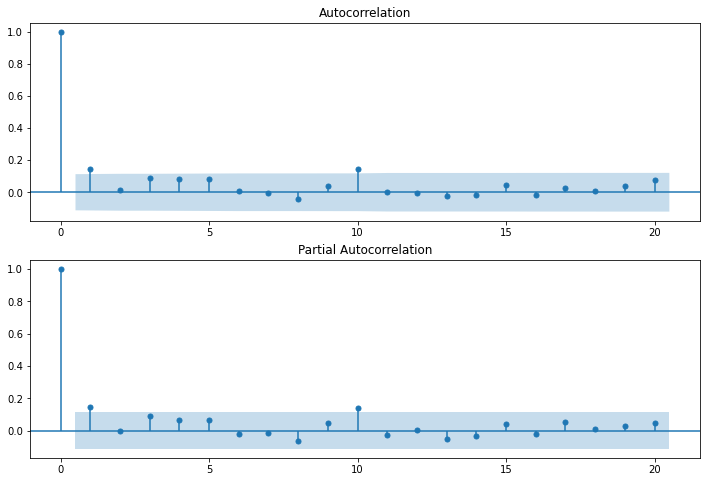

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N05C"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N05C"],lags=20,ax=ax2)

##### p = 0, 1; q = 0, 1

In [50]:
stepwise_fit = auto_arima(data['N05C'],trace = True,suppress_warnings=True,start_p=0,max_p=1,start_q=0,max_q=1,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1549.079, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1544.803, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1544.735, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1853.156, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1546.707, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1744.321, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.392 seconds


In [54]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(0,0,1))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(0,0,1))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                   N05C   No. Observations:                  301
Model:                     ARMA(0, 1)   Log Likelihood                -767.036
Method:                       css-mle   S.D. of innovations              3.094
Date:                Thu, 03 Jun 2021   AIC                           1540.071
Time:                        16:02:48   BIC                           1551.192
Sample:                    01-05-2014   HQIC                          1544.521
                         - 10-06-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1446      0.205     20.254      0.000       3.744       4.546
ma.L1.N05C     0.1481      0.058      2.552      0.011       0.034       0.262
                                    Roots           

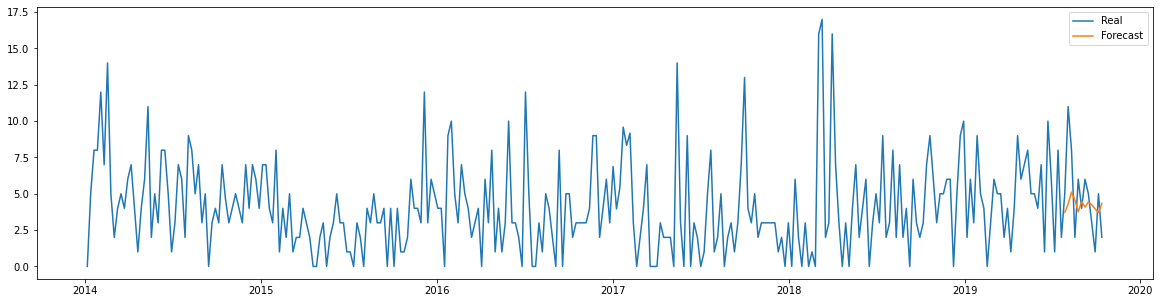

In [55]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [56]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

2.7147591187880495


In [57]:
stepwise_fit = auto_arima(data['N05C'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1551.199, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1549.079, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1546.800, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1546.735, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1853.156, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1544.735, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1546.735, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1548.729, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1546.707, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=1546.729, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1544.803, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1546.287, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=1744.321, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 2.394 seconds


In [61]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,0,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

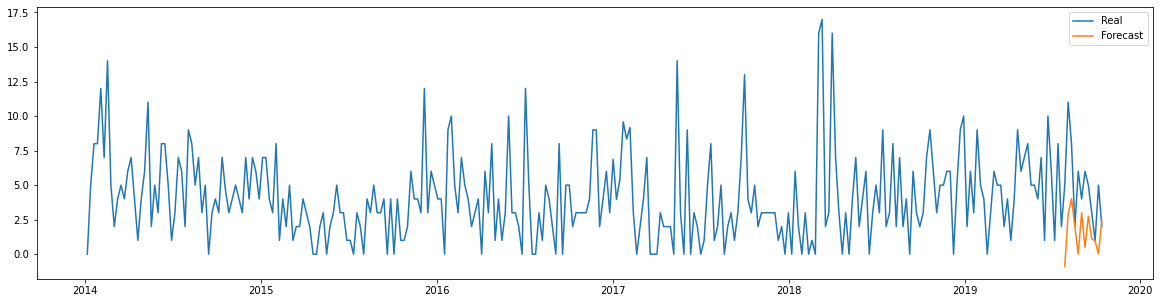

In [62]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [63]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

4.251278505982533


## R03

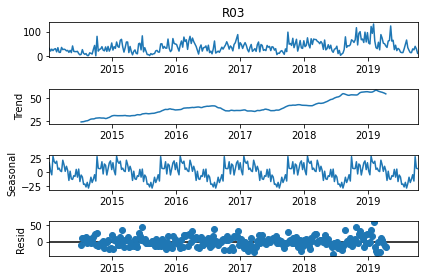

In [58]:
decompose_result = seasonal_decompose(data["R03"],model='additive')
decompose_result.plot();

In [69]:
df = data.loc[:,['R03']]
train = df[:-12]
test = df[-12:]

In [66]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add',trend='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

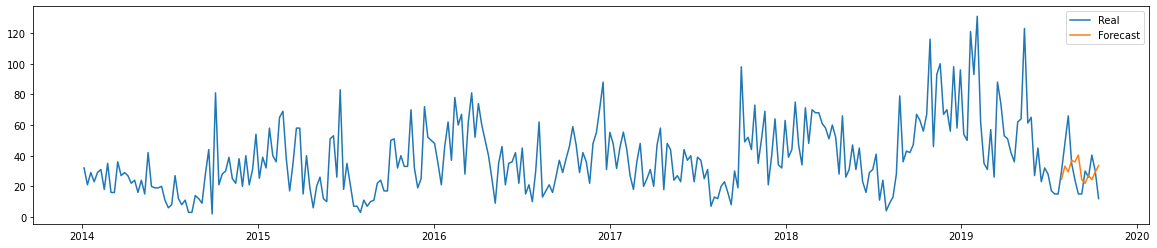

In [67]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [68]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

16.468274789414135


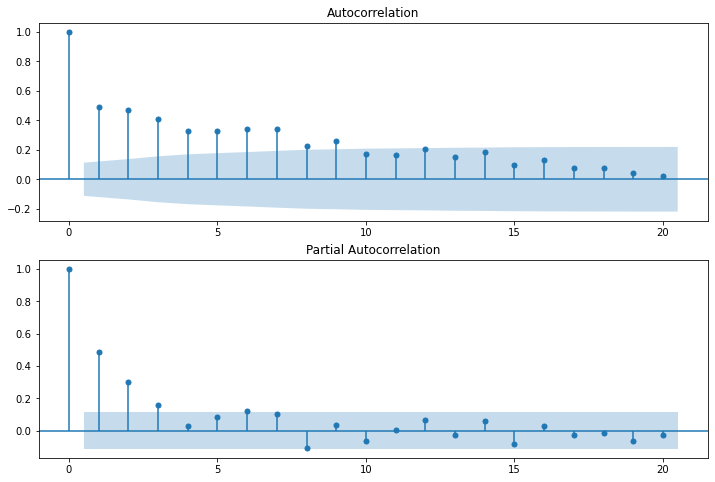

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["R03"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["R03"],lags=20,ax=ax2)

##### p = 0, 1, 2, 3 ; 0-9

In [57]:
stepwise_fit = auto_arima(data['R03'],trace = True,suppress_warnings=True,start_p=0,max_p=3,start_q=0,max_q=9,test='adf',d=0)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2751.267, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2671.280, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2703.738, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3154.562, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2644.524, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2639.357, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2637.972, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2636.498, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2634.605, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2636.514, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2678.755, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2638.449, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2643.353, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.885 seconds


In [65]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,1))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,1))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                    R03   No. Observations:                  301
Model:                     ARMA(1, 1)   Log Likelihood               -1308.859
Method:                       css-mle   S.D. of innovations             18.699
Date:                Thu, 03 Jun 2021   AIC                           2625.718
Time:                        16:06:17   BIC                           2640.546
Sample:                    01-05-2014   HQIC                          2631.651
                         - 10-06-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0179      4.427      8.588      0.000      29.341      46.695
ar.L1.R03      0.9112      0.035     25.917      0.000       0.842       0.980
ma.L1.R03     -0.6257      0.068     -9.258      0.0

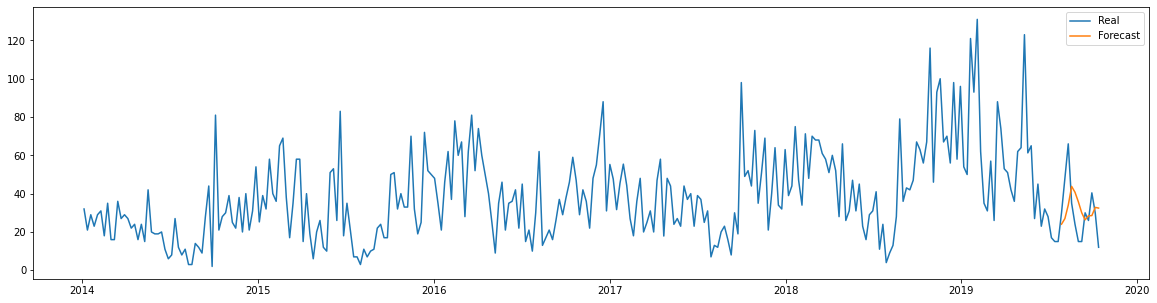

In [66]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [67]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

16.067648764259737


In [68]:
stepwise_fit = auto_arima(data['R03'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2749.424, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2673.737, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2636.548, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2747.427, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2635.054, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2636.669, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2636.791, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2636.845, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2672.643, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2638.726, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2633.055, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2634.670, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12]     

In [70]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

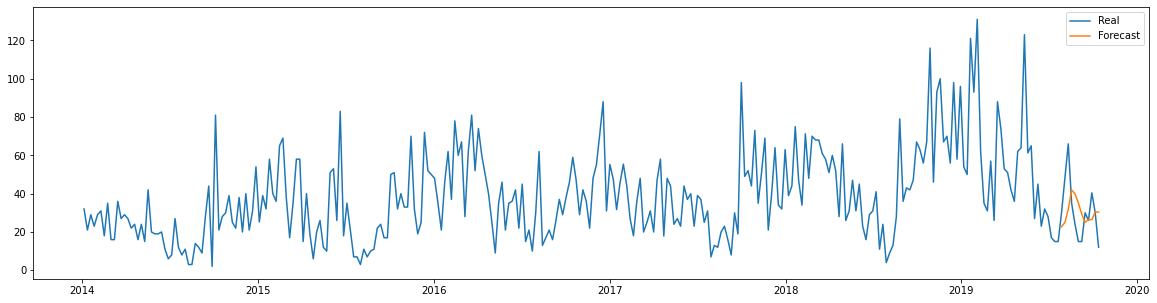

In [71]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [72]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

16.3834379164619


## R06

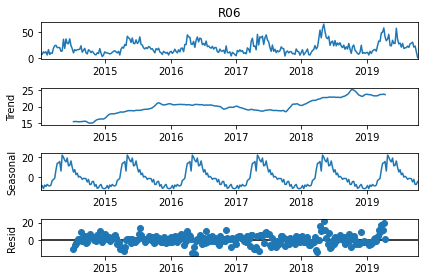

In [69]:
decompose_result = seasonal_decompose(data["R06"],model='additive')
decompose_result.plot();

In [74]:
df = data.loc[:,['R06']]
train = df[:-12]
test = df[-12:]

In [74]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

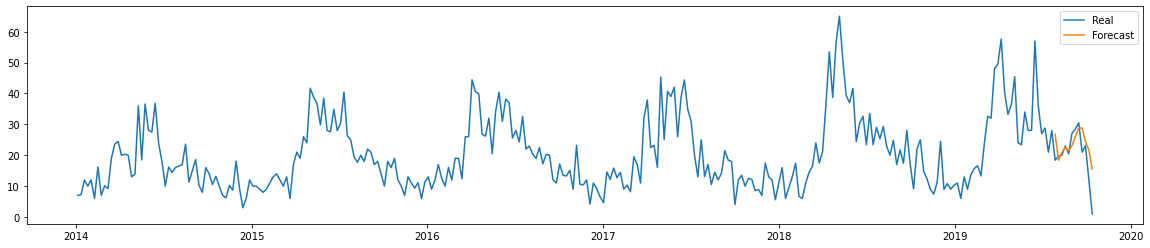

In [75]:
fig = plt.figure(figsize=(20,4))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [76]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.204906715921561


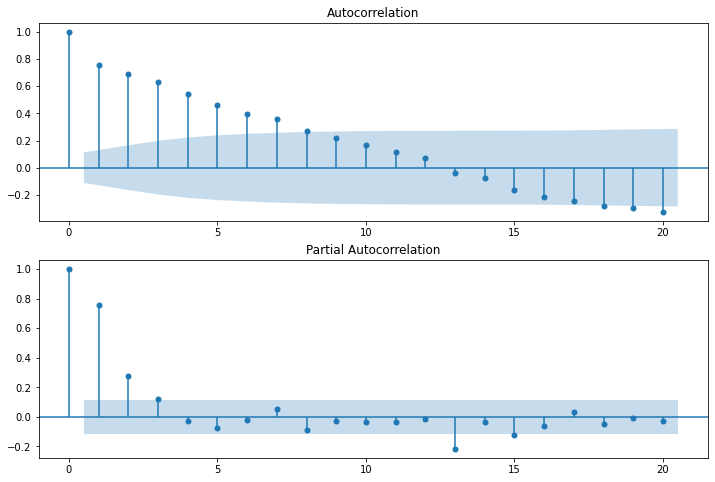

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["R06"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["R06"],lags=20,ax=ax2)

##### p = 0, 1, 2, 3 ; q = 0-8

In [62]:
stepwise_fit = auto_arima(data['R06'],trace = True,suppress_warnings=True,start_p=0,max_p=3,start_q=0,max_q=8,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2328.957, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2071.401, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2193.733, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2758.052, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2049.289, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2047.892, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2049.731, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2048.999, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2057.964, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.703 seconds


In [75]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(3,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(3,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                    R06   No. Observations:                  301
Model:                     ARMA(3, 0)   Log Likelihood               -1013.584
Method:                       css-mle   S.D. of innovations              7.005
Date:                Thu, 03 Jun 2021   AIC                           2037.168
Time:                        16:08:28   BIC                           2055.703
Sample:                    01-05-2014   HQIC                          2044.585
                         - 10-06-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8268      2.572      7.709      0.000      14.786      24.867
ar.L1.R06      0.5104      0.057      8.901      0.000       0.398       0.623
ar.L2.R06      0.2283      0.063      3.612      0.0

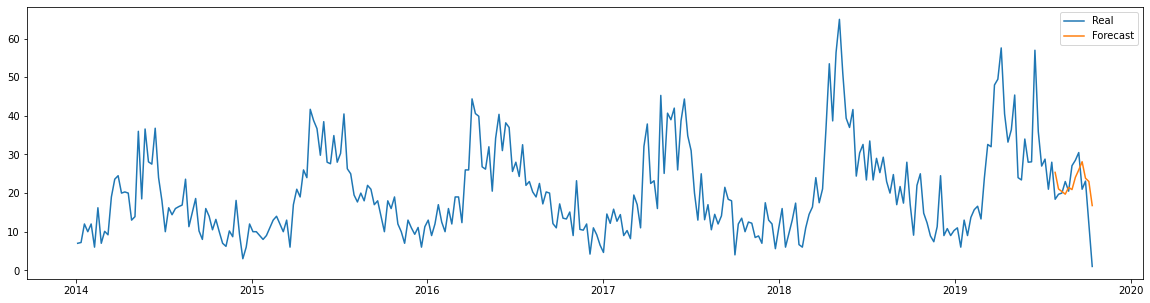

In [76]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [77]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.825915570686366


In [73]:
stepwise_fit = auto_arima(data['R06'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2038.771, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2328.957, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2067.359, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2188.454, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2758.052, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2037.593, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2041.981, Time=0.45 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2036.287, Time=1.53 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2042.541, Time=2.04 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=2047.779, Time=0.55 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=2048.318, Time=0.70 sec
 ARIMA(3,0,2)(0,0,2)[12] intercept   : AIC=2047.425, Time=1.31 sec
 ARIMA(2,0,3)(0,0,2)[12] intercept   : AIC=2048.022, Time=1.20 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2047.018, Time=0.49 sec
 ARIMA(1,0,3)(0,0,2

In [78]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(2,0,2),seasonal_order=(0,0,2,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

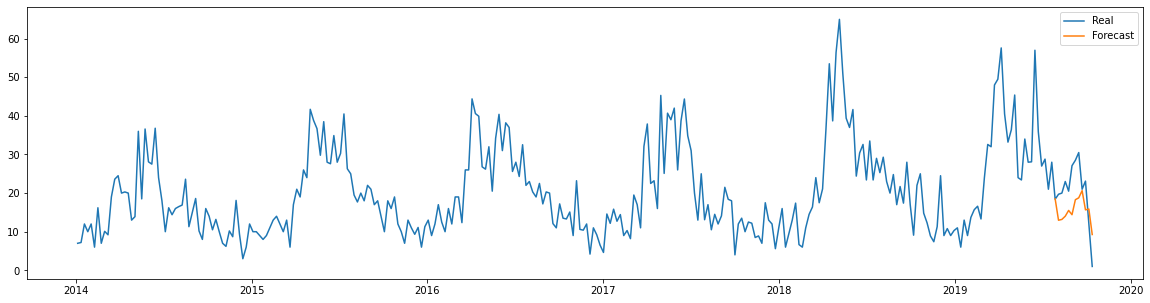

In [79]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [80]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.844485312013899
